In [1]:
import os
import sys

repo_root_path = os.path.abspath(os.path.join(os.path.pardir, 'hebbnets'))
if repo_root_path not in sys.path:
    sys.path.append(repo_root_path)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from hebbnets.hebbnets.hah_model import MultilayerHahEmbedding

%matplotlib nbagg

In [2]:
data_X, data_Y = load_iris(return_X_y=True)

In [3]:
input_layer_size = data_X.shape[1]
nodes_per_layer = [2]

hah_network = MultilayerHahEmbedding(
    input_layer_size,
    nodes_per_layer,
    has_bias=False,
    act_type='linear',
)

In [4]:
hah_network.train(
    list(zip(data_X, data_Y)),
    num_epochs=10
)

## Getting coordinates for each datapoint

In [5]:
coords = []
for x in data_X:
    hah_network.propogate_input(x)
    coords.append(hah_network.layers[0].activation)

coord_x, coord_y = list(zip(*coords))

color_dict = {0:'r', 1:'b', 2:'g'}
coord_colors = [color_dict[i] for i in data_Y]

## Plotting clusters

<IPython.core.display.Javascript object>


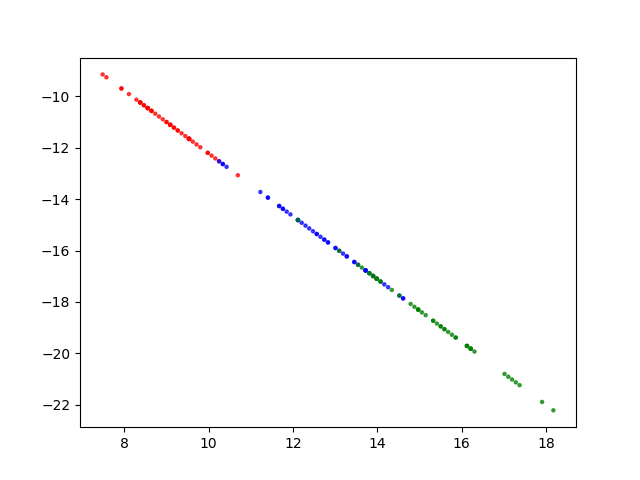

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(
    coord_x, coord_y,
    s=5, alpha=0.7,
    c=coord_colors
)